In [1]:
# Illustration of 4 possible outcomes, as a function of difference in transmission and clearancerate between two strains,
# for different values of k and R0. We highlight the respective regions in differentcolors, according to the 
# critical relationship between \Delta b, \Delta \nu, k and R0 when perturbations happen only beta_i,gamma_i, 
# and mixed coinfection clearance happens u_{11} = u_{12} = u_{21} = \nu_1, u_{22} = \nu_2, k_{ij} = k
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline
from matplotlib import colors

In [2]:
# Compute values of two pairwise invasion fitnesses
def fitness(del_nu,del_b): 
    lambd21 =  gamm/(2*(gamm + r))*(2*mu**2 + 3*mu + 2)/((mu + 1)**2)*del_nu + del_b
    lambd12 = -gamm/(2*(gamm + r))*(2*mu**2 +   mu    )/((mu + 1)**2)*del_nu - del_b
    return lambd21, lambd12

def outcome(L21, L12): #Compute the value E1, E2, B, C for each value (\Delta \nu, \Delta b)
    pos1 = L21 > 0
    pos2 = L12 > 0
    neg1 = L21 < 0
    neg2 = L12 < 0

    #matrix of scenarios
    coex = (-10)*pos1*pos2
    s1 = -2*pos1*neg2
    s2 =  2*neg1*pos2
    bista =   10*neg1*neg2
    scen = coex + s1 + s2 + bista
    return scen

Text(0.04, 0.5, 'Relative variation in transmission rate $\\Delta b$')

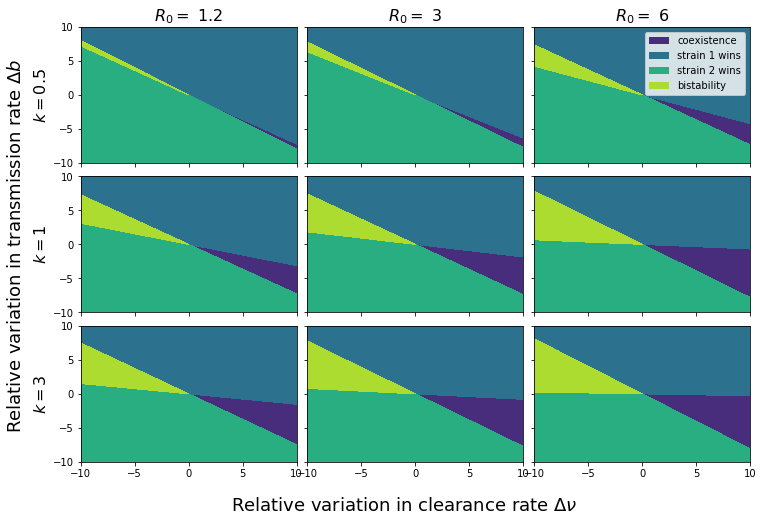

In [3]:
gamm = 1 #clearance rate
r = 0.2 #mortality as well as recruitment rate

X = np.linspace(-10, 10, 2000)
Y = np.linspace(10, -10, 2000)
x, y =  np.meshgrid(X, Y)

fig1, ax = plt.subplots(nrows = 3, ncols = 3, sharex='col', sharey='row', squeeze=False, gridspec_kw={'hspace': 0.1, 'wspace': 0.05}, figsize=(12,8))
((f11, f12, f13), (f21, f22, f23), (f31, f32, f33)) = ax

R0_arr = np.array([1.2, 3, 6]) #values of R0
k_arr  = np.array([0.5, 1, 3]) #values of k

for i in range (0, 3):
    for j in range (0, 3):
        R0 = R0_arr[i]
        k = k_arr[j]
        mu = 1/(k*(R0 - 1))
        
        L21, L12  = fitness(x, y)
        
        #matrix positive and negative for fitness of each strain
        scen = outcome(L21, L12)
        ax[i,j].contourf(x, y, scen, levels = [-10,-5, 0, 5,10])

proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in f33.collections]
f13.legend(proxy, ["coexistence", "strain 1 wins", "strain 2 wins", "bistability"])


cols = ['$R_0 =$ {}'.format(R) for R in (1.2, 3, 6)] #set value R0 for each column
rows = ['$k =$ {}'.format(k) for k in (0.5, 1, 3) ] #set value k for each row

for ax, col in zip(ax[0], cols):
    ax.set_title(col, fontsize = 16)
    
f11.set_ylabel('$k = 0.5$', fontsize = 16)
f21.set_ylabel('$k = 1$', fontsize = 16)
f31.set_ylabel('$k = 3$', fontsize = 16)

fig1.text(0.5, 0.04, 'Relative variation in clearance rate $\Delta\\nu$', fontsize = 18, ha='center')
fig1.text(0.04, 0.5, 'Relative variation in transmission rate $\Delta b$', fontsize = 18, va='center', rotation='vertical')